<a href="https://colab.research.google.com/github/USIS014320/Programacion-Computacional-III/blob/main/Clasificador_de_Ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTAR LIBRERIAS
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as tfds

In [ ]:
#cargamos nuestro dataset en variables
dataset, metedata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
dataTrain, dataTest = dataset['train'], dataset['test']

In [ ]:
name = ["Top/Camiseta","Pantalon","Sueter","Vestido","Abrigo","Sandalia","Camiseta","Zapatilla","Bolsa","Bota de tobillo"]

In [ ]:
#Pasar a variables los datos de entrenamiento y prueba
numTraint = metedata.splits["train"].num_examples
numTest = metedata.splits["test"].num_examples
print(numTraint, numTest)

60000 10000


In [ ]:
#funcion normalizadora de los pixeles de 0 - 255 que sean de  0 - 1
def normalizacion(imgs, lbls):
  imgs = tf.cast(imgs, tf.float32)
  imgs /= 255
  return imgs, lbls

In [ ]:
#llamamos la funcion normalizadora en ambos datset
dataTrain = dataTrain.map(normalizacion)
dataTest = dataTest.map(normalizacion)

In [ ]:
#estructuramos nuestra red nueronal
modelo = tf.keras.Sequential([
         tf.keras.layers.Flatten(input_shape=(28,28,1)), #capa de entrada de 28*28 = 784 neuronas una para cada pixel
         tf.keras.layers.Dense(80, activation=tf.nn.relu), #capa oculta con 80 neuronas, funcion de activacion relu
         tf.keras.layers.Dense(80, activation=tf.nn.relu), # capa oculta con 80 neuronas, funcion de activacion relu
         tf.keras.layers.Dense(10, activation=tf.nn.softmax) # capa de salida con 10 neuronas, funcion de activacion sofmax. esta funcion es requerida para clasificacion            
])

In [ ]:
#compilamos el modelo de red neuronal e indicamos las finciones da utilizar
modelo.compile(
    optimizer= "adam",
    loss= "sparse_categorical_crossentropy",
    metrics= ['accuracy']
)

In [ ]:
#entrenamiento por lostes
batchsize = 32
dataTrain = dataTrain.repeat().shuffle(numTraint).batch(batchsize)
dataTest = dataTest.repeat().shuffle(numTest).batch(batchsize)

In [ ]:
#entrrenando nuestro modelos de datos
modelo.fit(dataTrain, epochs=5, steps_per_epoch=math.ceil(numTraint/batchsize), verbose=2)

Epoch 1/5
1875/1875 - 16s - loss: 0.9083 - accuracy: 0.6754
Epoch 2/5
1875/1875 - 7s - loss: 0.5880 - accuracy: 0.7867
Epoch 3/5
1875/1875 - 7s - loss: 0.5332 - accuracy: 0.8087
Epoch 4/5


In [ ]:
#evaluar modelo con los datos de prueba
perFail, accuracy = modelo.evaluate(dataTest, steps=math.ceil(numTest/batchsize))
print(f"Resultado de las pruebas: {perFail, accuracy}")

313/313 [==============================] - 2s 3ms/step - loss: 0.3444 - accuracy: 0.8704
Resultado de las pruebas: (0.3443901240825653, 0.8704073429107666)


In [ ]:
#GRAFICAR LA IMAGEN 
def grafImgagen(prdArray, trueLabels, img):
  prdArray, trueLabels, img = prdArray[i], trueLabels[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  lblPrd = np.argmax(prdArray)
  if lblPrd == trueLabels:
    color = "green"
  else:
    color = "red"
  
  plt.xlabel("Predict: {}".format(name[lblPrd]), color=color)

In [ ]:
#convertimos los tensores o imagenes en matrices numpy
for imgTest, tagTest in dataTest.take(1):
  imgTest = imgTest.numpy()
  tagTest = tagTest.numpy()
  prd = modelo.predict(imgTest)

In [ ]:
#Graficamos los valores de las matriz una para las imagenes y otra para las graficas de barra segun el acierto
def grafiMatriz(prdMatriz, trueTag):
  prdMatriz, trueTag = prdMatriz[i], trueTag[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.ylim([0,1])
  thisPlot = plt.bar(range(10), prdMatriz, color='#9CC8BB')
  prdTag = np.argmax(prdMatriz)

  thisPlot[prdTag].set_color("red")
  thisPlot[trueTag].set_color("black")

In [ ]:
import cv2
#AGREGAR LA IMAGEN
imgLocal = cv2.imread('/content/sandalia.png', 0)
imgLocal = tf.cast(imgLocal, tf.float32)
imgLocal = imgLocal / 255
imgLocal = np.expand_dims(imgLocal, axis=0)

print(imgLocal.shape)

(1, 28, 28)


In [ ]:
#ENTRENAR
PrdLocal = modelo.predict(imgLocal, batch_size=1)
tagLocalTest = np.argmax(PrdLocal)


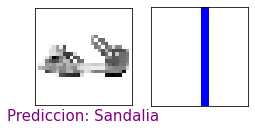

In [ ]:
#IMPRIMIR LOS RESULTADOS
columns = 2
rows = 2

plt.figure(figsize=(2*2*columns, 2*rows))
plt.subplot(rows, 2*columns, 2*0+1)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imgLocal[0,...], cmap=plt.cm.binary)
# plt.colorbar()
plt.xlabel("Prediccion: {}".format(name[tagLocalTest]), color='purple')

plt.subplot(rows, 2*columns, 2*0+2)
plt.grid(False)
plt.xticks([])
plt.yticks([])
thisplot = plt.bar(range(10), PrdLocal[0], color='#777777')
plt.ylim([0,1])
thisplot[tagLocalTest].set_color("red")
thisplot[tagLocalTest].set_color("blue")

plt.rcParams['font.size'] = 15
plt.show()

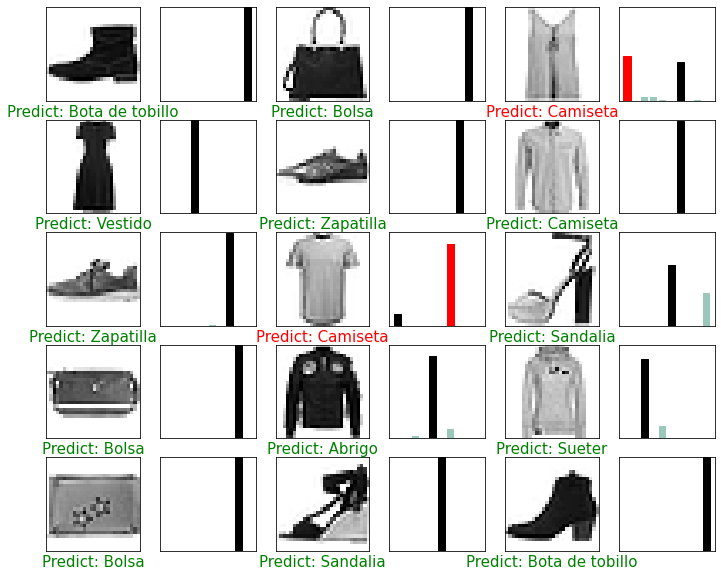

In [ ]:
#RECORRER IMAGENES A GRAFICAR 
rows = 5
columns = 3
numImg = rows*columns

plt.figure(figsize=(2*2*columns, 2*rows))

for i in range(numImg):
  plt.subplot(rows, 2*columns, 2*i+1)
  grafImgagen(prd, tagTest, imgTest)

  plt.subplot(rows, 2*columns, 2*i+2)
  grafiMatriz(prd, tagTest)

plt.rcParams['font.size'] = 14
plt.show()